<h2> <center> PPOL561 | AI and DEVELOPMENT  </center></h2>
<h3> <center> Final Group Project - Data Collection and Cleaning</center></h3>
<h4> <center> Miho, Moeko and Sonali </center></h4>


This notebook involves data collection and cleaning for Cook County Data on Air Pollution and Covid Mortality. This is for the final group project for the AI and Development Class. 


In [92]:
#Importing required modules 
import pandas as pd 
import numpy as np

#For web-scraping and API query
import requests 

#For normalizing API query result to a dataframe
from pandas import json_normalize

#To randomly split data into training and testing
from sklearn.model_selection import train_test_split


# Plotting libraries
from plotnine import *
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
import sklearn.metrics as m
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


In [2]:
# This is the API query to return covid data for Cook County

r = requests.get("https://datacatalog.cookcountyil.gov/resource/3trz-enys.json?covid_related=true")

In [3]:
# Status code is 200, so its good

r.status_code


200

In [4]:
# Checking results

#r.json()

In [5]:
#Converting the API query into a dataframe using the pd.json_normalize function
df = pd.json_normalize(r.json())

In [6]:
#A small snippet of the code
df.head()

,objectid,incident_date,incident_zip,residence_zip,primarycause_linea,race,opioids,incident_city,residence_city,chi_ward,...,longitude,casenumber,primarycause,death_date,incident_street,gunrelated,location.latitude,location.needs_recoding,location.longitude,primarycause_lineb
0,71207,2022-11-12T00:00:00.000,60621,60621,NOVEL CORONA (COVID-19) VIRAL INFECTION,Black,False,CHICAGO,Chicago,20.0,...,-87.63386683,ME2022-09704,PNEUMONIA,2022-12-01T06:28:00.000,324 West 59th Street,False,41.78653217,False,-87.63386683,NaN
1,70677,2022-11-09T07:30:00.000,60637,60637,NaN,Black,False,CHICAGO,Chicago,20.0,...,-87.61729039,ME2022-09173,ORGANIC CARDIOVASCULAR DISEASE,2022-11-09T08:08:00.000,6842 S. CALUMET APT 1,False,41.7698461,False,-87.61729039,NaN
2,70639,2022-10-27T00:00:00.000,60026,60026,FALL,White,False,GLENVIEW,Glenview,NaN,...,-87.8167389,ME2022-09140,COMPLICATIONS OF FEMUR FRACTURE,2022-11-05T11:23:00.000,2500 Indigo Lane,False,42.08101955,False,-87.8167389,NaN
3,70492,2022-10-20T00:00:00.000,60504,60504,MOTOR VEHICLE ACCIDENT,Asian,False,AURORA,Aurora,NaN,...,NaN,ME2022-08998,COMPLICATIONS OF MULTIPLE INJURIES,2022-11-01T18:22:00.000,INTERSECTION OF AURORA ROAD AND ILLINOIS ROUTE 59,False,NaN,NaN,NaN,NaN
4,70108,NaN,NaN,61201,NaN,Black,False,NaN,Rock Island,NaN,...,NaN,ME2022-08607,COMPLICATIONS OF NOVEL CORONA (COVID-19) VIRAL...,2022-02-07T15:08:00.000,NaN,False,NaN,NaN,NaN,NaN


In [7]:
#Dimensions of the resultant dataframe
df.shape

(1000, 29)

API call only pulls the first 1000 rows of data, hence data was directly downloaded and cleaned to obtain a larger sample size

In [8]:
#Directly downloaded from Cook County Website : https://datacatalog.cookcountyil.gov/Public-Safety/Medical-Examiner-Case-Archive-COVID-19-Related-Dea/3trz-enys/data
df_new = pd.read_csv("covid_related_deaths.csv")

In [9]:
#A small snippet of the code
df_new.head()

,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Residence City,Residence Zip,Manner of Death,...,Commissioner District,Incident Address,Incident City,Incident Zip Code,longitude,latitude,location,OBJECTID,Chicago Ward,Chicago Community Area
0,ME2020-02618,04/13/2020 03:14:00 AM,04/13/2020 03:45:00 AM,45.0,Female,White,True,Chicago,60629,NATURAL,...,11.0,6010 S KENNETH AVE,CHICAGO,60629,-87.734185,41.783629,"(41.78362875, -87.73418465)",35366,13.0,WEST LAWN
1,ME2020-02982,04/10/2020 12:00:00 PM,04/17/2020 11:48:00 AM,90.0,Female,Black,False,Chicago,60605,NATURAL,...,NaN,10124 South Kedzie,CHICAGO,60619,NaN,NaN,NaN,35722,NaN,NaN
2,ME2020-03369,04/17/2020 12:00:00 AM,04/21/2020 08:36:00 PM,66.0,Male,White,False,Lyons,60534,NATURAL,...,16.0,4637 Custer,LYONS,60534,-87.839670,41.806451,"(41.80645125, -87.83967006)",36131,NaN,NaN
3,ME2020-04120,04/04/2020 12:00:00 AM,04/30/2020 01:50:00 AM,56.0,Male,White,False,Des Plaines,60018,NATURAL,...,NaN,9205 Potter Road,DES PLAINES,60018,NaN,NaN,NaN,36863,NaN,NaN
4,ME2020-04573,04/15/2020 11:56:00 AM,05/03/2020 03:40:00 PM,79.0,Male,White,False,Chicago,60626,NATURAL,...,NaN,7445 n. Sherican Road,CHICAGO,60626,NaN,NaN,NaN,37325,NaN,NaN


In [10]:
#Dimension - Much larger dataset obtained
df_new.shape

(15376, 28)

In [11]:
#Checking for the number of missing data in each column of the data
df_new.isna().sum()

Case Number                   0
Date of Incident            992
Date of Death                 0
Age                           3
Gender                        6
Race                         73
Latino                        0
Residence City              160
Residence Zip               140
Manner of Death              80
Primary Cause                 0
Primary Cause Line A       4635
Primary Cause Line B      12888
Primary Cause Line C      15372
Secondary Cause            1271
Gun Related                  80
COVID Related                 0
Opioid Related               80
Commissioner District      2723
Incident Address            658
Incident City               731
Incident Zip Code           701
longitude                  2721
latitude                   2721
location                   2721
OBJECTID                      0
Chicago Ward               8800
Chicago Community Area     8800
dtype: int64

In [12]:
#Removing rows that have empty values for Date of Incident
df_covid = df_new[df_new['Date of Incident'].notna()]


In [13]:
#Checking dimensions again. 
df_covid.shape

(14384, 28)

In [14]:
#Checking for the datatype of each column
df_covid.dtypes

Case Number                object
Date of Incident           object
Date of Death              object
Age                       float64
Gender                     object
Race                       object
Latino                       bool
Residence City             object
Residence Zip              object
Manner of Death            object
Primary Cause              object
Primary Cause Line A       object
Primary Cause Line B       object
Primary Cause Line C       object
Secondary Cause            object
Gun Related                object
COVID Related                bool
Opioid Related             object
Commissioner District     float64
Incident Address           object
Incident City              object
Incident Zip Code          object
longitude                 float64
latitude                  float64
location                   object
OBJECTID                    int64
Chicago Ward              float64
Chicago Community Area     object
dtype: object

Since the date columns are not of date type, next few steps will split them into day, month, year columns, and then combine them together to one column of date format.

In [15]:
#Splitting into day, month and year for Date oF Incident
df_covid['year']=df_covid['Date of Incident'].astype(str).str.slice(start = 6, stop=11)
df_covid['month']=df_covid['Date of Incident'].astype(str).str.slice(stop=2)
df_covid['day']=df_covid['Date of Incident'].astype(str).str.slice(start=3, stop=5)
df_covid.head(2)

,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Residence City,Residence Zip,Manner of Death,...,Incident Zip Code,longitude,latitude,location,OBJECTID,Chicago Ward,Chicago Community Area,year,month,day
0,ME2020-02618,04/13/2020 03:14:00 AM,04/13/2020 03:45:00 AM,45.0,Female,White,True,Chicago,60629,NATURAL,...,60629,-87.734185,41.783629,"(41.78362875, -87.73418465)",35366,13.0,WEST LAWN,2020,04,13
1,ME2020-02982,04/10/2020 12:00:00 PM,04/17/2020 11:48:00 AM,90.0,Female,Black,False,Chicago,60605,NATURAL,...,60619,NaN,NaN,NaN,35722,NaN,NaN,2020,04,10


In [16]:
#Combining into one date column
df_covid['incident_date']=pd.to_datetime(df_covid[["year", "month", "day"]])
df_covid.head(2)

,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Residence City,Residence Zip,Manner of Death,...,longitude,latitude,location,OBJECTID,Chicago Ward,Chicago Community Area,year,month,day,incident_date
0,ME2020-02618,04/13/2020 03:14:00 AM,04/13/2020 03:45:00 AM,45.0,Female,White,True,Chicago,60629,NATURAL,...,-87.734185,41.783629,"(41.78362875, -87.73418465)",35366,13.0,WEST LAWN,2020,04,13,2020-04-13
1,ME2020-02982,04/10/2020 12:00:00 PM,04/17/2020 11:48:00 AM,90.0,Female,Black,False,Chicago,60605,NATURAL,...,NaN,NaN,NaN,35722,NaN,NaN,2020,04,10,2020-04-10


In [17]:
#Changing for Date of Death
df_covid['year']=df_covid['Date of Death'].str.slice(start = 6, stop=11)
df_covid['month']=df_covid['Date of Death'].str.slice(stop=2)
df_covid['day']=df_covid['Date of Death'].str.slice(start=3, stop=5)
df_covid.head(2)

,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Residence City,Residence Zip,Manner of Death,...,longitude,latitude,location,OBJECTID,Chicago Ward,Chicago Community Area,year,month,day,incident_date
0,ME2020-02618,04/13/2020 03:14:00 AM,04/13/2020 03:45:00 AM,45.0,Female,White,True,Chicago,60629,NATURAL,...,-87.734185,41.783629,"(41.78362875, -87.73418465)",35366,13.0,WEST LAWN,2020,04,13,2020-04-13
1,ME2020-02982,04/10/2020 12:00:00 PM,04/17/2020 11:48:00 AM,90.0,Female,Black,False,Chicago,60605,NATURAL,...,NaN,NaN,NaN,35722,NaN,NaN,2020,04,17,2020-04-10


In [18]:
#Combining into one date column
df_covid['death_date']=pd.to_datetime(df_covid[['year', 'month', 'day']])
df_covid.head(2)

,Case Number,Date of Incident,Date of Death,Age,Gender,Race,Latino,Residence City,Residence Zip,Manner of Death,...,latitude,location,OBJECTID,Chicago Ward,Chicago Community Area,year,month,day,incident_date,death_date
0,ME2020-02618,04/13/2020 03:14:00 AM,04/13/2020 03:45:00 AM,45.0,Female,White,True,Chicago,60629,NATURAL,...,41.783629,"(41.78362875, -87.73418465)",35366,13.0,WEST LAWN,2020,04,13,2020-04-13,2020-04-13
1,ME2020-02982,04/10/2020 12:00:00 PM,04/17/2020 11:48:00 AM,90.0,Female,Black,False,Chicago,60605,NATURAL,...,NaN,NaN,35722,NaN,NaN,2020,04,17,2020-04-10,2020-04-17


In [19]:
#Dropping columns that are not required
df_covid = df_covid.drop(['year', 'month', 'day', 'Date of Incident', 'Date of Death'], axis=1)

In [20]:
#Check data types again
df_covid.dtypes

Case Number                       object
Age                              float64
Gender                            object
Race                              object
Latino                              bool
Residence City                    object
Residence Zip                     object
Manner of Death                   object
Primary Cause                     object
Primary Cause Line A              object
Primary Cause Line B              object
Primary Cause Line C              object
Secondary Cause                   object
Gun Related                       object
COVID Related                       bool
Opioid Related                    object
Commissioner District            float64
Incident Address                  object
Incident City                     object
Incident Zip Code                 object
longitude                        float64
latitude                         float64
location                          object
OBJECTID                           int64
Chicago Ward    

In [21]:
#Checking the unique residence cities
df_covid['Residence City'].unique()

array(['Chicago', 'Lyons', 'Des Plaines', 'Fort Myers', 'Evergreen Park',
       'Evanston', 'Stone Park', 'Chicago Heights', 'Wheeling',
       'Mundelein', 'Deerfield', 'Long Grove', 'Skokie', 'Waukegan', nan,
       'Franklin Park', 'Schaumburg', 'Aurora', 'Mchenry', 'Brookfield',
       'Stuart', 'Carol Stream', 'Lemont', 'Oak Park', 'Hanover Park',
       'Tomball', 'Posen', 'Bolingbrook', 'Homer Glen', 'Clarendon Hills',
       'Northbrook', 'Hometown', 'Harvey', 'Glen Ellyn', 'Roselle',
       'Niles', 'Wood Dale', 'Oak Forest', 'Wauconda',
       'Hot Springs National Park', 'Monee', 'Cicero', 'Oak Lawn',
       'Glenview', 'Flossmoor', 'Orland Park', 'Dolton', 'Palos Heights',
       'Richton Park', 'Matteson', 'Markham', 'Country Club Hills',
       'Morton Grove', 'Elk Grove Village', 'Palos Hills', 'La Grange',
       'Burbank', 'Streamwood', 'Melrose Park', 'CRESTWOOD', 'Berwyn',
       'HARWOOD HEIGHTS', 'Hoffman Estates', 'Lincolnwood', 'Bridgeview',
       'Woodstock', 

In [22]:
#Reading the data on ozone concentration for cook county - data obtained from replication paper
df_air_ozone = pd.read_excel('air_data_cook_county.xlsx', sheet_name='Excel Table S2')

In [23]:
#removing column that is not required
df_air_ozone.columns = df_air_ozone.iloc[0]
df_air_ozone= df_air_ozone.iloc[1:]
#Final data snippet
df_air_ozone.head(2)

,Date,Community,O3
1,2020-01-01 00:00:00,Arlington Heights,16.24463
2,2020-01-01 00:00:00,Berwyn,16.662646


In [24]:
#Check data types
df_air_ozone.dtypes

0
Date         object
Community    object
O3           object
dtype: object

In [25]:
#Changing date column to date type
df_air_ozone['year']=df_air_ozone['Date'].astype(str).str.slice(stop=4)
df_air_ozone['month']=df_air_ozone['Date'].astype(str).str.slice(start=5,stop=7)
df_air_ozone['day']=df_air_ozone['Date'].astype(str).str.slice(start=8, stop=10)
df_air_ozone.head(2)

,Date,Community,O3,year,month,day
1,2020-01-01 00:00:00,Arlington Heights,16.24463,2020,01,01
2,2020-01-01 00:00:00,Berwyn,16.662646,2020,01,01


In [26]:
#Combine to date type
df_air_ozone['Date']=pd.to_datetime(df_air_ozone[['year', 'month', 'day']])

In [27]:
#Dropping columns not required
df_air_ozone = df_air_ozone.drop(['year', 'month', 'day'], axis=1)
df_air_ozone.head(2)

,Date,Community,O3
1,2020-01-01,Arlington Heights,16.24463
2,2020-01-01,Berwyn,16.662646


In [28]:
#Reading the data on PM25 concentration for cook county - data obtained from replication paper
df_air_pm = pd.read_excel('air_data_cook_county.xlsx', sheet_name='Excel Table S1')

In [29]:
#Removing columns not required
df_air_pm.columns = df_air_pm.iloc[0]
df_air_pm= df_air_pm.iloc[1:]

In [30]:
#Changing to date type
df_air_pm['year']=df_air_pm['Date'].astype(str).str.slice(stop=4)
df_air_pm['month']=df_air_pm['Date'].astype(str).str.slice(start=5,stop=7)
df_air_pm['day']=df_air_pm['Date'].astype(str).str.slice(start=8, stop=10)

df_air_pm['Date']=pd.to_datetime(df_air_pm[['year', 'month', 'day']])
df_air_pm = df_air_pm.drop(['year', 'month', 'day'], axis=1)
df_air_pm.head(2)

,Date,Community,PM25
1,2020-01-01,Arlington Heights,6.407797
2,2020-01-01,Berwyn,6.398207


In [31]:
#Merging the ozone and PM25 concentration data on Date and Community columns
df_air =pd.merge(df_air_ozone, df_air_pm, on=['Date','Community'])
df_air.head(5)

,Date,Community,O3,PM25
0,2020-01-01,Arlington Heights,16.24463,6.407797
1,2020-01-01,Berwyn,16.662646,6.398207
2,2020-01-01,Chicago,16.818227,6.331325
3,2020-01-01,Chicago Heights,17.874201,6.62253
4,2020-01-01,Cicero,16.725865,6.541267


Group Members found the three week average data for each air concentration, hence that data will be used henceforth

In [32]:
df_air = pd.read_excel('3-w-average concentrations.xlsx')

In [33]:
df_air

,Date of Incident,Residence City,PM25,O3
0,2020-04-13,Chicago,8.478705,17.674449
1,2020-04-10,Chicago,8.187682,17.291590
2,2020-04-04,Des Plaines,8.107422,15.745224
3,2020-04-15,Chicago,7.663319,17.933277
4,2020-04-05,Chicago,8.285309,15.181170
...,...,...,...,...
6272,2021-01-17,Chicago,10.612178,13.965973
6273,2021-01-04,Chicago,9.171002,13.365465
6274,2021-02-28,Chicago,11.195879,19.294769
6275,2020-11-23,Chicago,7.719075,16.990477


In [34]:
#This data had a large number of duplicate rows, hence they will be removed
df_air = df_air.drop_duplicates(keep='first')
df_air.shape

(1739, 4)

In [35]:
df_air.dtypes

Date of Incident    datetime64[ns]
Residence City              object
PM25                       float64
O3                         float64
dtype: object

In [36]:
#Converting community column to lower case so that it is easy to merge with mortality data later
df_air['Residence City']=df_air['Residence City'].str.lower()
df_air.head(2)

,Date of Incident,Residence City,PM25,O3
0,2020-04-13,chicago,8.478705,17.674449
1,2020-04-10,chicago,8.187682,17.291590


In [37]:
#Converting Residence City to lower case so that it is merged properly with air concentration data
df_covid['Residence City']=df_covid['Residence City'].str.lower()


In [38]:
#Renaming columns for easier merger
df_covid= df_covid.rename(columns = {'incident_date':'Date'})
df_air= df_air.rename(columns = {'Date of Incident':'Date'})
df_covid

,Case Number,Age,Gender,Race,Latino,Residence City,Residence Zip,Manner of Death,Primary Cause,Primary Cause Line A,...,Incident City,Incident Zip Code,longitude,latitude,location,OBJECTID,Chicago Ward,Chicago Community Area,Date,death_date
0,ME2020-02618,45.0,Female,White,True,chicago,60629,NATURAL,NOVEL CORONA (COVID-19) VIRUS INFECTION,NaN,...,CHICAGO,60629,-87.734185,41.783629,"(41.78362875, -87.73418465)",35366,13.0,WEST LAWN,2020-04-13,2020-04-13
1,ME2020-02982,90.0,Female,Black,False,chicago,60605,NATURAL,PNEUMONIA,NOVEL CORONA (COVID-19) VIRUS INFECTION,...,CHICAGO,60619,NaN,NaN,NaN,35722,NaN,NaN,2020-04-10,2020-04-17
2,ME2020-03369,66.0,Male,White,False,lyons,60534,NATURAL,ACUTE RESPIRATORY FAILURE,NOVEL CORONA (COVID-19) VIRUS INFECTION,...,LYONS,60534,-87.839670,41.806451,"(41.80645125, -87.83967006)",36131,NaN,NaN,2020-04-17,2020-04-21
3,ME2020-04120,56.0,Male,White,False,des plaines,60018,NATURAL,NOVEL CORONA (COVID-19) VIRUS INFECTION,NaN,...,DES PLAINES,60018,NaN,NaN,NaN,36863,NaN,NaN,2020-04-04,2020-04-30
4,ME2020-04573,79.0,Male,White,False,chicago,60626,NATURAL,NOVEL CORONA (COVID-19) VIRUS INFECTION,NaN,...,CHICAGO,60626,NaN,NaN,NaN,37325,NaN,NaN,2020-04-15,2020-05-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15371,ME2022-03734,74.0,Male,White,False,palos hills,60465,NATURAL,ACUTE RESPIRATORY FAILURE WITH HYPOXIA,PNEUMONIA,...,PALOS HILLS,60465,-87.819657,41.708649,"(41.70864866, -87.81965685)",65238,NaN,NaN,2022-02-20,2022-03-03
15372,ME2021-09161,90.0,Male,Black,False,chicago,60644,NATURAL,ACUTE RESPIRATORY FAILURE WITH HYPOXIA,PNEUMONIA,...,CHICAGO,60644,-87.757137,41.873158,"(41.87315829, -87.75713736)",58050,29.0,AUSTIN,2021-09-28,2021-09-30
15373,ME2022-03098,84.0,Male,White,False,lincolnshire,60069,NATURAL,NOVEL CORONA (COVID-19) VIRAL INFECTION,NaN,...,WHEELING,60090,-87.935127,42.124934,"(42.12493375, -87.93512654)",64602,NaN,NaN,2022-02-12,2022-02-12
15374,ME2022-01637,54.0,Male,Black,False,burnham,60633,NATURAL,NOVEL CORONA (COVID-19) VIRAL INFECTION,NaN,...,BURNHAM,60633,-87.561381,41.634694,"(41.63469436, -87.56138074)",63148,NaN,NaN,2022-01-19,2022-01-19


In [39]:
#Merging the two datasets
df_merged =pd.merge(df_covid, df_air, on=['Date','Residence City'], how='inner')
df_merged.shape

(6965, 30)

In [40]:
#Check column Names
df_merged.columns

Index(['Case Number', 'Age', 'Gender', 'Race', 'Latino', 'Residence City',
       'Residence Zip', 'Manner of Death', 'Primary Cause',
       'Primary Cause Line A', 'Primary Cause Line B', 'Primary Cause Line C',
       'Secondary Cause', 'Gun Related', 'COVID Related', 'Opioid Related',
       'Commissioner District', 'Incident Address', 'Incident City',
       'Incident Zip Code', 'longitude', 'latitude', 'location', 'OBJECTID',
       'Chicago Ward', 'Chicago Community Area', 'Date', 'death_date', 'PM25',
       'O3'],
      dtype='object')

In [41]:
#Remove the rows where death due to Gun Related and Opoid Related Cases are True 
#(if we only remove the column, we will still end up having data that has death due to these cases)
df_merged = df_merged[df_merged['Gun Related']!=True]
df_merged = df_merged[df_merged['Opioid Related']!=True]
df_merged.shape

(6954, 30)

In [42]:
#Only Keeping columns required - some of these columns will be changed later
df_final = df_merged[['Date', 'Residence City', 'O3', 'PM25','Age', 'Gender', 'Race', 'Latino', 'Manner of Death', 'Primary Cause']]

In [43]:
df_final.head(5)

,Date,Residence City,O3,PM25,Age,Gender,Race,Latino,Manner of Death,Primary Cause
0,2020-04-13,chicago,17.674449,8.478705,45.0,Female,White,True,NATURAL,NOVEL CORONA (COVID-19) VIRUS INFECTION
1,2020-04-13,chicago,17.674449,8.478705,51.0,Male,Black,False,NATURAL,ACUTE RESPIRATORY DISTRESS SYNDROME
2,2020-04-13,chicago,17.674449,8.478705,61.0,Female,Black,False,NATURAL,BRONCHOPNEUMONIA
3,2020-04-13,chicago,17.674449,8.478705,86.0,Male,Black,False,NATURAL,NOVEL CORONA (COVID-19) VIRUS INFECTION
4,2020-04-13,chicago,17.674449,8.478705,73.0,Male,Black,False,NATURAL,BRONCHOPNEUMONIA


In [44]:
#Checking the unique values of manner of death
df_final['Manner of Death'].unique()

array(['NATURAL', nan, 'ACCIDENT', 'SUICIDE'], dtype=object)

In [45]:
#Only keeping those rows where manner of death is natural
df_final = df_final[df_final['Manner of Death'] == 'NATURAL']

#Dropping column
df_final = df_final.drop(['Manner of Death'], axis=1)


In [46]:
#Dummies for Primary Causes
primary_causes_dummies = pd.get_dummies(df_final['Primary Cause'])

In [47]:
#This shows that there are totally 289 unique primary cases - not all are associated with covid
primary_causes_dummies

,ACCUTE HYPOXEMIC RESPIRATORY FAILURE,ACIUTE HYPOXIC RESPIRATORY FAILURE,ACUTE HYPOXIC RESPIRATORY FAILURE,ACUTE AND CHRONIC HYPOXIC RESPIRATORY FAILURE,ACUTE CARDIOPULMONARY FAILURE,ACUTE CONGESTIVE HEART FAILURE,ACUTE HEMORRHAGIC INFARCT,ACUTE HYPERCAPNIC AND HYPOXIC RESPIRATORY FAILURE,ACUTE HYPERCAPNIC RESPIRATORY FAILURE,ACUTE HYPERCAPNIC/HYPOXIC RESPIRATORY FAILURE,...,SUSPECTED NOVEL CORONA VIRUS (COVID-19) INFECTION,SYSTEMIC LUPUS ERYTHEMATOSUS,TUBERCULOSIS OF BRAIN,UNSPECIFIED BACTERIAL PNEUMONIA,UPPER GASTROINTESTINAL TRACT BLEEDING,URINARY TRACT INFECTION,VIRAL PNEUMONIA,VIRAL PNEUMONITIS,VIRAL SEPSIS,VULVAR CANCER
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6962,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
#Subsetting the data to those rows where primary vause contains the word COVID
df_temp1 = df_final[df_final["Primary Cause"].str.contains("COVID")]
#Assigning an indicator variable, and giving value 1 for all primary causes due to covid
df_temp1['Primary Cause Covid']=1


In [49]:
#For all other rows, the indicator column takes value 0
df_temp2 = df_final[~df_final["Primary Cause"].str.contains("COVID")]
df_temp2['Primary Cause Covid']=0


In [50]:
#Now we combine them back together
df_final = pd.concat((df_temp1, df_temp2), axis=0)
df_final.head(2)

,Date,Residence City,O3,PM25,Age,Gender,Race,Latino,Primary Cause,Primary Cause Covid
0,2020-04-13,chicago,17.674449,8.478705,45.0,Female,White,True,NOVEL CORONA (COVID-19) VIRUS INFECTION,1
3,2020-04-13,chicago,17.674449,8.478705,86.0,Male,Black,False,NOVEL CORONA (COVID-19) VIRUS INFECTION,1


In [51]:
#Drop Primary Cause Column
df_final = df_final.drop(['Primary Cause'], axis=1)

In [52]:
#Remove all missing value from the data
df_final_new = df_final.dropna()

In [53]:
df_final_new.shape

(6823, 9)

In [54]:
#Changing gender column to dummy
gender_dummies = pd.get_dummies(df_final_new['Gender'])
gender_dummies = gender_dummies.drop(['Female'], axis =1) #Baseline
df_final_new = pd.concat([df_final_new.drop(['Gender'], axis=1), gender_dummies], axis=1)


In [55]:
#Change Race column to dummies
race_dummies = pd.get_dummies(df_final_new['Race'])
race_dummies = race_dummies.drop(['Unknown'], axis =1) #Baseline

df_final_new = pd.concat([df_final_new.drop(['Race'], axis=1), race_dummies], axis=1)

In [56]:
#Change Latino column to 0/1 from False/True
df_final_new['Latino'] = df_final_new['Latino'].astype(int)
df_final_new.head(2)

,Date,Residence City,O3,PM25,Age,Latino,Primary Cause Covid,Male,Am. Indian,Asian,Black,Other,White
0,2020-04-13,chicago,17.674449,8.478705,45.0,1,1,0,0,0,0,0,1
3,2020-04-13,chicago,17.674449,8.478705,86.0,0,1,1,0,0,1,0,0


In [57]:
df_final_new.dtypes

Date                   datetime64[ns]
Residence City                 object
O3                            float64
PM25                          float64
Age                           float64
Latino                          int32
Primary Cause Covid             int64
Male                            uint8
Am. Indian                      uint8
Asian                           uint8
Black                           uint8
Other                           uint8
White                           uint8
dtype: object

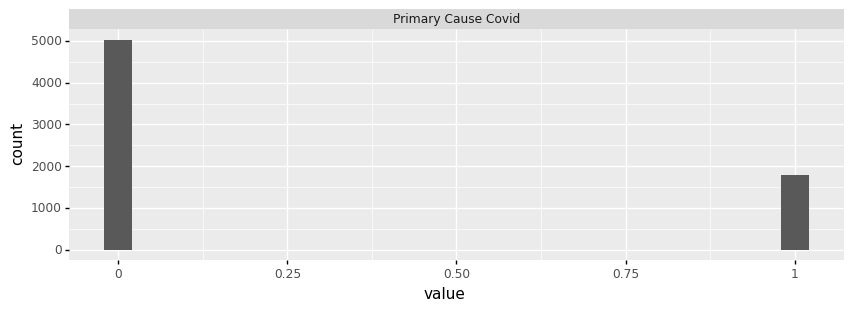

<ggplot: (139115857966)>

In [58]:
# Plot the Target Variable - we have an unbalanced dataset - this is a limitation of the data
d = df_final_new.select_dtypes(include="int64").melt()
(
    ggplot(d,aes(x="value")) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(10,3),
          subplots_adjust={'wspace':0.25})
)

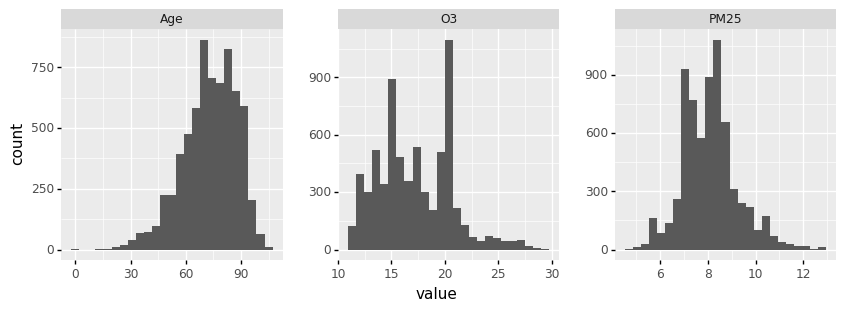

<ggplot: (139115897137)>

In [59]:
# Plot the continuous Variables 
d = df_final_new.select_dtypes(include="float").melt()
(
    ggplot(d,aes(x="value")) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(10,3),
          subplots_adjust={'wspace':0.25})
)

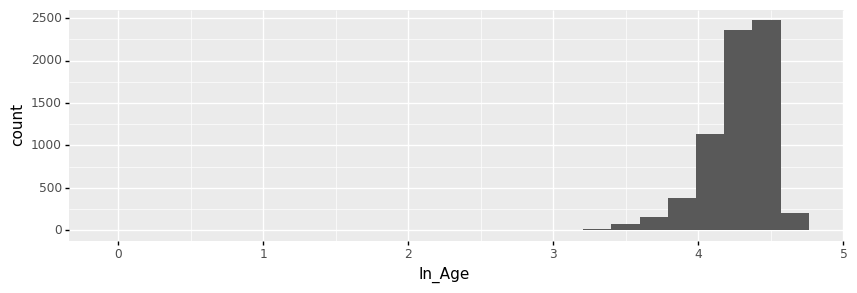

<ggplot: (139115837931)>

In [60]:
#There is a left skew in age, hence this will be logged 
#The image below shows a lesser skew in Age after logging
d = df_final_new.copy()
d['ln_Age'] =  np.log(d['Age'] + 1)
(
    ggplot(d,aes(x="ln_Age")) +
    geom_histogram(bins=25) +
    theme(figure_size=(10,3),
          subplots_adjust={'wspace':0.25})
)

In [61]:
#Logging the age variable in the dataset
df_final_new['Age'] = np.log(df_final_new['Age'] + 1)

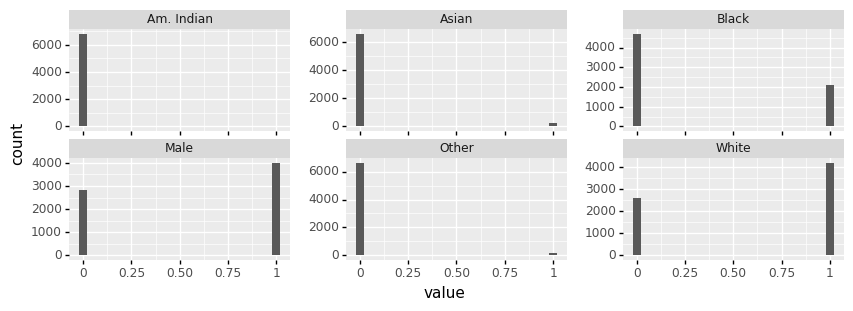

<ggplot: (139115949084)>

In [62]:
# Distribution of Race Variable
d = df_final_new.select_dtypes(include="uint8").melt()
(
    ggplot(d,aes(x="value")) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(10,3),
          subplots_adjust={'wspace':0.25})
)

In [103]:
#Split into training and testing
y = df_final_new[['Primary Cause Covid']]
X = df_final_new.drop(columns=['Primary Cause Covid'])
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=123, shuffle=True)

In [104]:
#Training data
train_y = pd.DataFrame(train_y)
train_X = pd.DataFrame(train_X)
train_data = pd.concat([train_y, train_X], axis=1)


In [105]:
#Testing data
test_y = pd.DataFrame(test_y)
test_X = pd.DataFrame(test_X)
test_data = pd.concat([test_y, test_X], axis=1)


In [66]:
#Save the results to working directory
train_data.to_excel('training_data.xlsx', engine='xlsxwriter')  
test_data.to_excel('test_data.xlsx', engine='xlsxwriter')  

df_final_new.to_excel('air_covid_cook_county.xlsx', engine='xlsxwriter')  

In [106]:
y = df_final_new[['Primary Cause Covid']]
X = df_final_new.drop(columns=['Primary Cause Covid', 'Date', 'Residence City'])

In [107]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=123, shuffle=True)

In [108]:
train_X

,O3,PM25,Age,Latino,Male,Am. Indian,Asian,Black,Other,White
1043,20.107565,8.497250,4.276666,0,1,0,0,1,0,0
5938,11.621988,10.899059,4.290459,0,1,0,0,0,0,1
4608,15.867178,8.651553,4.418841,0,1,0,0,0,0,1
4273,14.875614,8.284106,4.356709,0,1,0,0,0,0,1
4681,14.674422,9.292591,4.510860,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4711,12.371690,8.507363,4.499810,0,0,0,0,0,0,1
3073,25.634150,11.101981,4.304065,0,1,0,0,0,0,1
5327,15.714486,7.371489,4.488636,0,1,0,0,1,0,0
2227,19.719817,7.608583,4.343805,1,1,0,0,0,0,1


Logistic Regression Model without considering Imbalance in dependent variable (this approach is wrong, but implemented just to see results. 

In [109]:
#Instantiate Logistic Regression Model
logr=LogisticRegression()

#Model Fit for Logistic Regression 
logr_fit = logr.fit(train_X, train_y)

#Generate Predictions
logr_pred = logr_fit.predict(test_X)

#Accuracy using test data
logr_acc = m.accuracy_score(test_y, logr_pred)
print("\nAccuracy of Logistic Regression Model :\t", logr_acc)


Accuracy of Logistic Regression Model :	 0.735052754982415


In [110]:
#Confusion matrix for Logistic Regression model
print("\n\nConfusion Matrix for Logistic Regression Model:\n")
df1 = pd.DataFrame(confusion_matrix(test_y, logr_pred), columns=["Predicted negative", "Predicted positive"],
            index=["Actual negative","Actual positive"]).style.background_gradient(cmap="Pastel2")
display(df1)



Confusion Matrix for Logistic Regression Model:



,Predicted negative,Predicted positive
Actual negative,1254,0
Actual positive,452,0


Logistic Regression Model with Oversampled data

In [111]:
over = RandomOverSampler(random_state=987)

In [112]:
x_over, y_over = over.fit_resample(X, y)

In [113]:
train_Xo, test_Xo, train_yo, test_yo = train_test_split(x_over,y_over,test_size = .25,random_state=123, shuffle=True)

In [114]:
#Instantiate Logistic Regression Model
logr2=LogisticRegression()

#Model Fit for Logistic Regression 
logr_fit2 = logr2.fit(train_Xo, train_yo)

#Generate Predictions
logr_pred2 = logr_fit2.predict(test_Xo)

#Accuracy using test data
logr_acc2 = m.accuracy_score(test_yo, logr_pred2)
print("\nAccuracy of Logistic Regression Model :\t", logr_acc2)


Accuracy of Logistic Regression Model :	 0.5452380952380952


In [90]:
#Confusion matrix for Logistic Regression model
print("\n\nConfusion Matrix for Logistic Regression Model with default value:\n")
df1 = pd.DataFrame(confusion_matrix(test_y, logr_pred), columns=["Predicted negative", "Predicted positive"],
            index=["Actual negative","Actual positive"]).style.background_gradient(cmap="Pastel2")
display(df1)



Confusion Matrix for Logistic Regression Model:



,Predicted negative,Predicted positive
Actual negative,1254,0
Actual positive,452,0


In [91]:
#Confusion matrix for Logistic Regression model
print("\n\nConfusion Matrix for Logistic Regression Model with oversampled data:\n")
df1= pd.DataFrame(confusion_matrix(test_yo, logr_pred2), columns=["Predicted negative", "Predicted positive"],
            index=["Actual negative","Actual positive"]).style.background_gradient(cmap="Pastel2")
display(df1)



Confusion Matrix for Logistic Regression Model with oversampled data:



,Predicted negative,Predicted positive
Actual negative,755,487
Actual positive,659,619


Logistic Regression with Undersampled data

In [93]:
under = RandomUnderSampler(random_state=987)

In [100]:
x_under, y_under = under.fit_resample(X, y)

In [95]:
train_Xu, test_Xu, train_yu, test_yu = train_test_split(x_under,y_under,test_size = .25,random_state=123, shuffle=True)

In [97]:
#Instantiate Logistic Regression Model
logr3=LogisticRegression()

#Model Fit for Logistic Regression 
logr_fit3 = logr3.fit(train_Xu, train_yu)

#Generate Predictions
logr_pred3 = logr_fit3.predict(test_Xu)

#Accuracy using test data
logr_acc3 = m.accuracy_score(test_yu, logr_pred3)
print("\nAccuracy of Logistic Regression Model :\t", logr_acc3)


Accuracy of Logistic Regression Model :	 0.484304932735426


In [99]:
#Confusion matrix for Logistic Regression model
print("\n\nConfusion Matrix for Logistic Regression Model with undersampled data:\n")
df3 = pd.DataFrame(confusion_matrix(test_yu, logr_pred3), columns=["Predicted negative", "Predicted positive"],
            index=["Actual negative","Actual positive"]).style.background_gradient(cmap="Pastel2")
display(df3)



Confusion Matrix for Logistic Regression Model with undersampled data:



,Predicted negative,Predicted positive
Actual negative,210,246
Actual positive,214,222


Oversampled Data has slightly higher accuracy, hence this data is saved after splitting into training and testing data. This was then shared to implement naive bayes model in Netica and logistic regression model in Stata.

In [115]:
#Training data
train_yo = pd.DataFrame(train_yo)
train_Xo = pd.DataFrame(train_Xo)
train_data = pd.concat([train_yo, train_Xo], axis=1)

In [116]:
#Testing data
test_yo = pd.DataFrame(test_yo)
test_Xo = pd.DataFrame(test_Xo)
test_data = pd.concat([test_yo, test_Xo], axis=1)


In [117]:
train_data.to_excel('training_data.xlsx', engine='xlsxwriter') 
test_data.to_excel('test_data.xlsx', engine='xlsxwriter')  
